<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/MovieRatingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In this example we're gonna use a file that contains data about the movie id, title and its genre. The other file contains the user id, movie id, ratings given by the user and its timestamps.

In [3]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('ratings.xlsx')
df.head()

,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,9,2022-12-06,Lionheart,movie,6.2,108.0,1990,"Action, Crime, Drama, Sport",39473,1990-08-01,Sheldon Lettich
1,8,2020-08-09,The Rental,movie,5.7,88.0,2020,"Drama, Horror, Mystery, Thriller",37686,2020-06-18,Dave Franco
2,8,2021-09-15,The Long Walk Home,movie,7.3,97.0,1990,"Drama, History",4799,1990-09-11,Richard Pearce
3,8,2023-02-21,Marked for Death,movie,5.9,93.0,1990,"Action, Crime, Drama, Thriller",24150,1990-10-05,Dwight H. Little
4,7,2021-07-05,Men at Work,movie,5.9,98.0,1990,"Action, Comedy, Crime",26558,1990-08-24,Emilio Estevez


In [4]:
# Displaying the number of rows and columns in the dataset:
df.shape

(2516, 11)

In [5]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Your Rating     2516 non-null   int64         
 1   Date Rated      2516 non-null   datetime64[ns]
 2   Title           2516 non-null   object        
 3   Title Type      2516 non-null   object        
 4   IMDb Rating     2516 non-null   float64       
 5   Runtime (mins)  2499 non-null   float64       
 6   Year            2516 non-null   int64         
 7   Genres          2516 non-null   object        
 8   Num Votes       2516 non-null   int64         
 9   Release Date    2516 non-null   datetime64[ns]
 10  Directors       2491 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 216.3+ KB


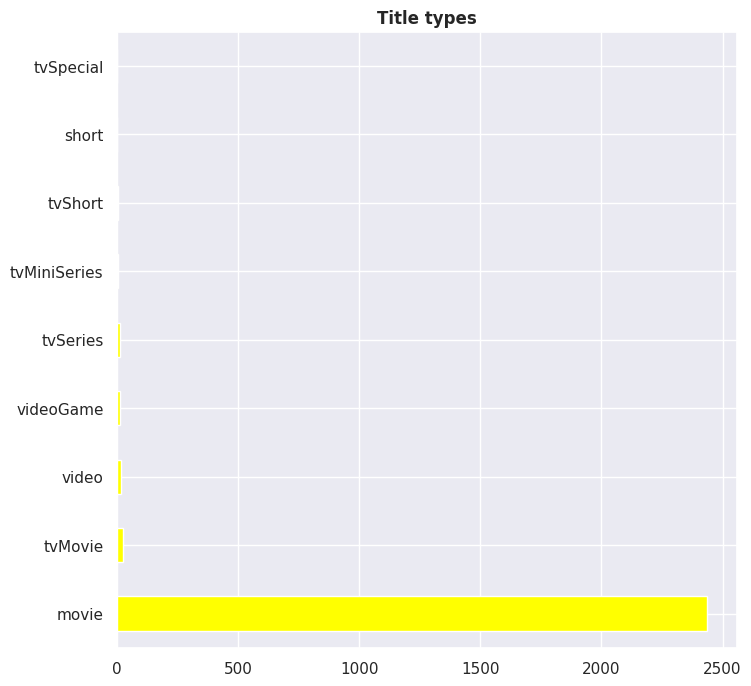

In [7]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [13]:
# Creating a datetime object based on the dates from the dataset:
df['Date Rated'] = df['Date Rated'].map(pd.to_datetime)
df['Day Rated'] = df['Date Rated'].apply(lambda x : x.day)
df['Month Rated'] = df['Date Rated'].apply(lambda x : x.month)
df['Year Rated'] = df['Date Rated'].apply(lambda x : x.year)

# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Your Rating     2516 non-null   int64         
 1   Date Rated      2516 non-null   datetime64[ns]
 2   Title           2516 non-null   object        
 3   Title Type      2516 non-null   object        
 4   IMDb Rating     2516 non-null   float64       
 5   Runtime (mins)  2499 non-null   float64       
 6   Year            2516 non-null   int64         
 7   Genres          2516 non-null   object        
 8   Num Votes       2516 non-null   int64         
 9   Release Date    2516 non-null   datetime64[ns]
 10  Directors       2491 non-null   object        
 11  Day Created     2516 non-null   int64         
 12  Month Created   2516 non-null   int64         
 13  Year Created    2516 non-null   int64         
 14  Day Rated       2516 non-null   int64         
 15  Mont

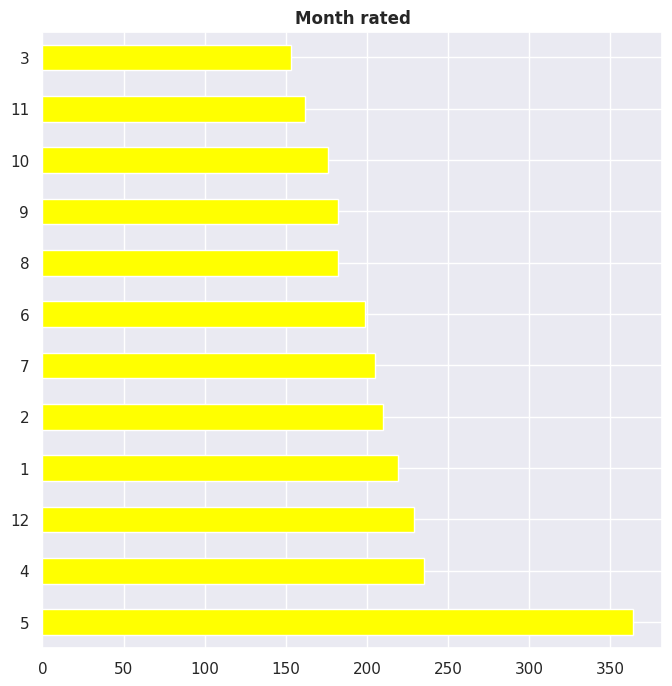

In [14]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Rated'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Month rated', fontweight = 'bold')
plt.show()

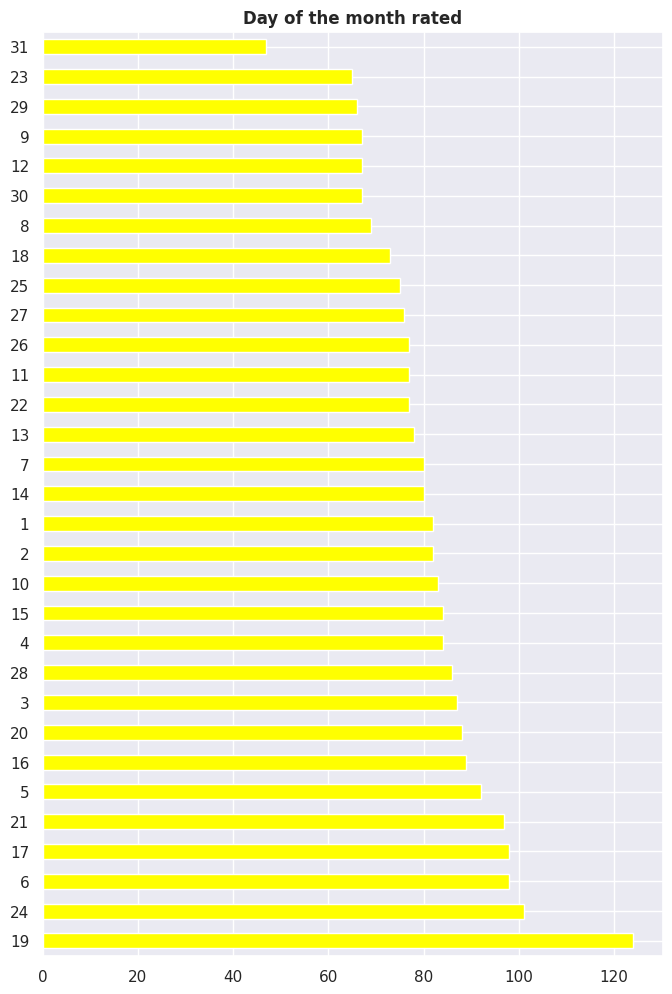

In [15]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Rated'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Day of the month rated', fontweight = 'bold')
plt.show()

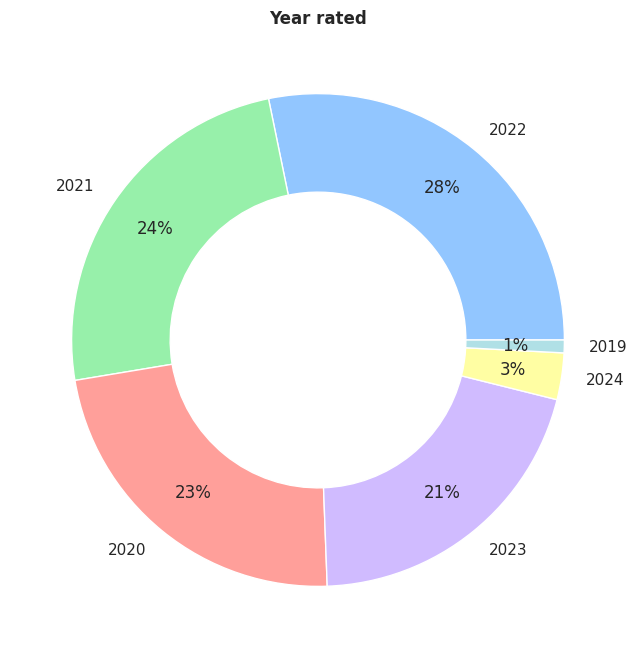

In [16]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year rated', fontweight = 'bold')
plt.show()

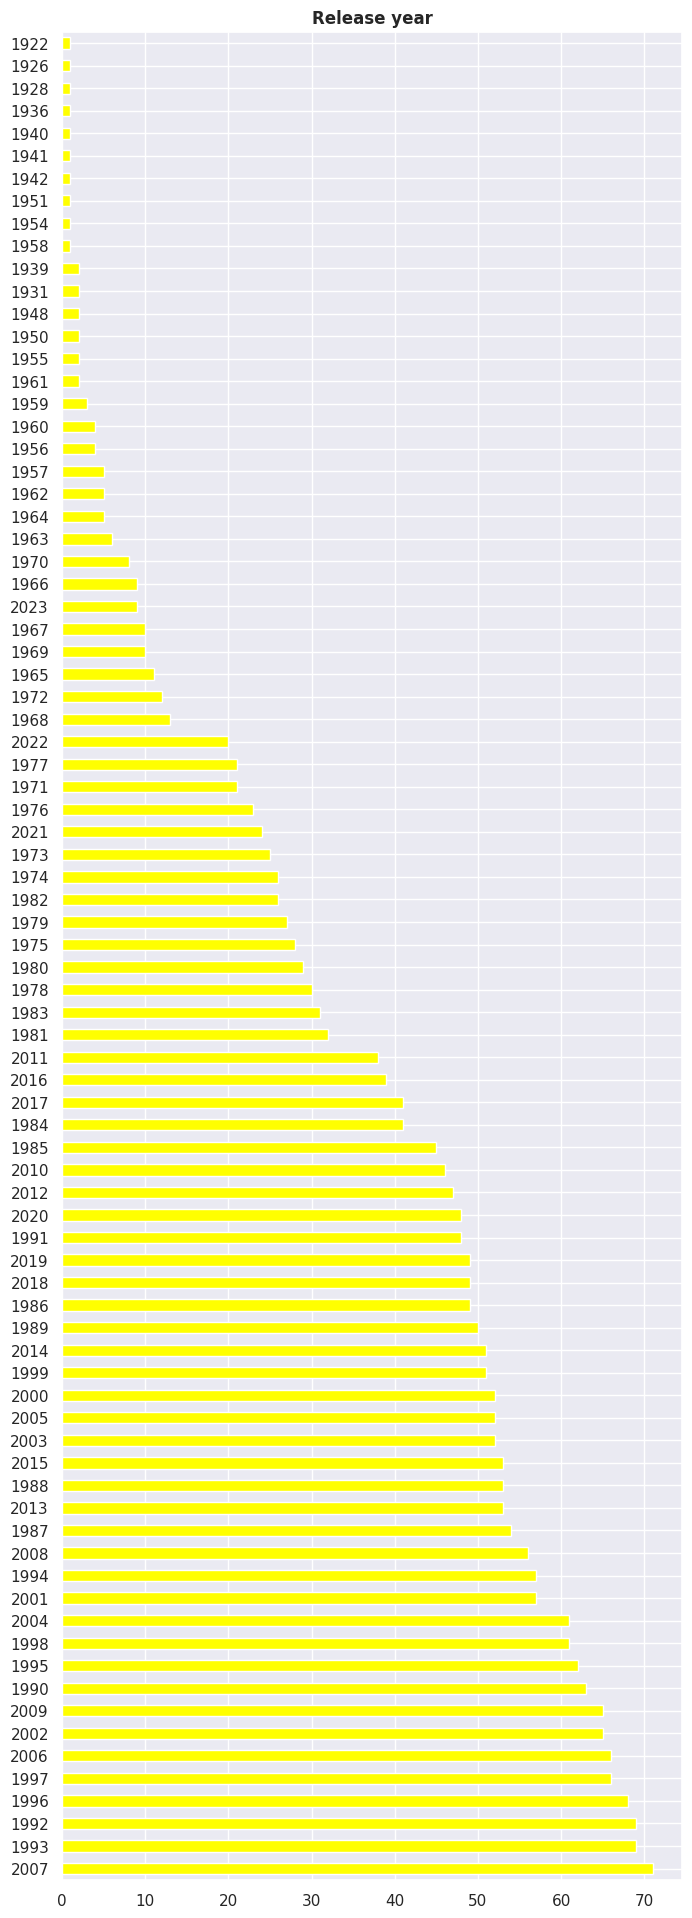

In [17]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head()

,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Day Rated,Month Rated,Year Rated,Quality
0,9,2022-12-06,Lionheart,movie,6.2,108.0,1990,"Action, Crime, Drama, Sport",39473,1990-08-01,Sheldon Lettich,6,12,2022,6,12,2022,Okay
1,8,2020-08-09,The Rental,movie,5.7,88.0,2020,"Drama, Horror, Mystery, Thriller",37686,2020-06-18,Dave Franco,9,8,2020,9,8,2020,Average
2,8,2021-09-15,The Long Walk Home,movie,7.3,97.0,1990,"Drama, History",4799,1990-09-11,Richard Pearce,15,9,2021,15,9,2021,Good
3,8,2023-02-21,Marked for Death,movie,5.9,93.0,1990,"Action, Crime, Drama, Thriller",24150,1990-10-05,Dwight H. Little,21,2,2023,21,2,2023,Average
4,7,2021-07-05,Men at Work,movie,5.9,98.0,1990,"Action, Comedy, Crime",26558,1990-08-24,Emilio Estevez,5,7,2021,5,7,2021,Average


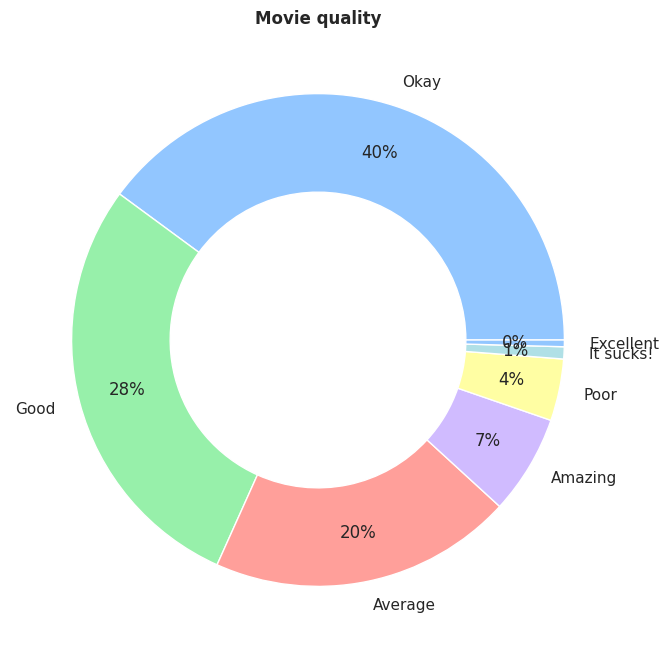

In [19]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less than 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head()

,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Day Rated,Month Rated,Year Rated,Quality,Movie popularity
0,9,2022-12-06,Lionheart,movie,6.2,108.0,1990,"Action, Crime, Drama, Sport",39473,1990-08-01,Sheldon Lettich,6,12,2022,6,12,2022,Okay,Over 10k votes
1,8,2020-08-09,The Rental,movie,5.7,88.0,2020,"Drama, Horror, Mystery, Thriller",37686,2020-06-18,Dave Franco,9,8,2020,9,8,2020,Average,Over 10k votes
2,8,2021-09-15,The Long Walk Home,movie,7.3,97.0,1990,"Drama, History",4799,1990-09-11,Richard Pearce,15,9,2021,15,9,2021,Good,Less than 10k votes
3,8,2023-02-21,Marked for Death,movie,5.9,93.0,1990,"Action, Crime, Drama, Thriller",24150,1990-10-05,Dwight H. Little,21,2,2023,21,2,2023,Average,Over 10k votes
4,7,2021-07-05,Men at Work,movie,5.9,98.0,1990,"Action, Comedy, Crime",26558,1990-08-24,Emilio Estevez,5,7,2021,5,7,2021,Average,Over 10k votes


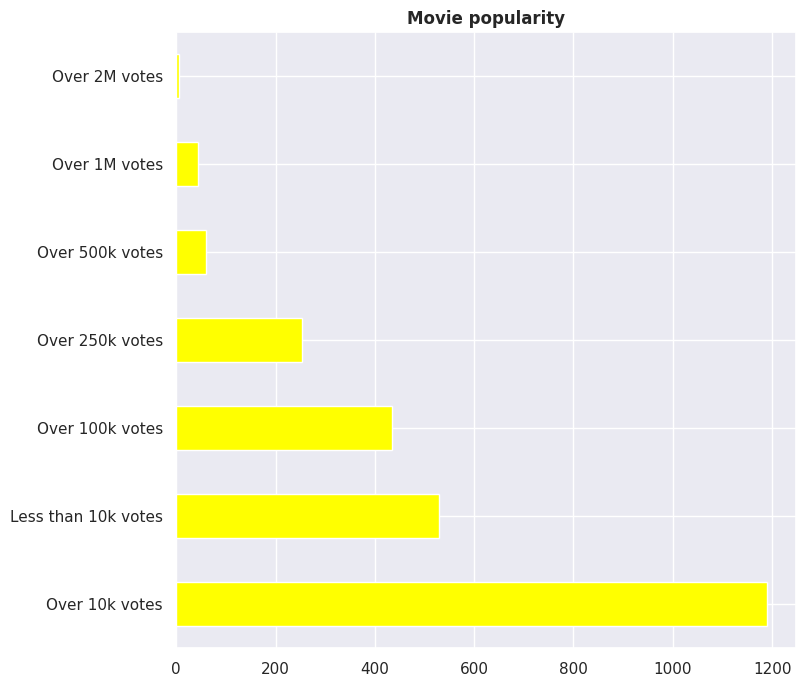

In [21]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head()

,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Day Rated,Month Rated,Year Rated,Quality,Movie popularity,Movie duration
0,9,2022-12-06,Lionheart,movie,6.2,108.0,1990,"Action, Crime, Drama, Sport",39473,1990-08-01,Sheldon Lettich,6,12,2022,6,12,2022,Okay,Over 10k votes,Between 1h40 and 1h59
1,8,2020-08-09,The Rental,movie,5.7,88.0,2020,"Drama, Horror, Mystery, Thriller",37686,2020-06-18,Dave Franco,9,8,2020,9,8,2020,Average,Over 10k votes,Between 1h10 and 1h29
2,8,2021-09-15,The Long Walk Home,movie,7.3,97.0,1990,"Drama, History",4799,1990-09-11,Richard Pearce,15,9,2021,15,9,2021,Good,Less than 10k votes,Between 1h30 and 1h39
3,8,2023-02-21,Marked for Death,movie,5.9,93.0,1990,"Action, Crime, Drama, Thriller",24150,1990-10-05,Dwight H. Little,21,2,2023,21,2,2023,Average,Over 10k votes,Between 1h30 and 1h39
4,7,2021-07-05,Men at Work,movie,5.9,98.0,1990,"Action, Comedy, Crime",26558,1990-08-24,Emilio Estevez,5,7,2021,5,7,2021,Average,Over 10k votes,Between 1h30 and 1h39


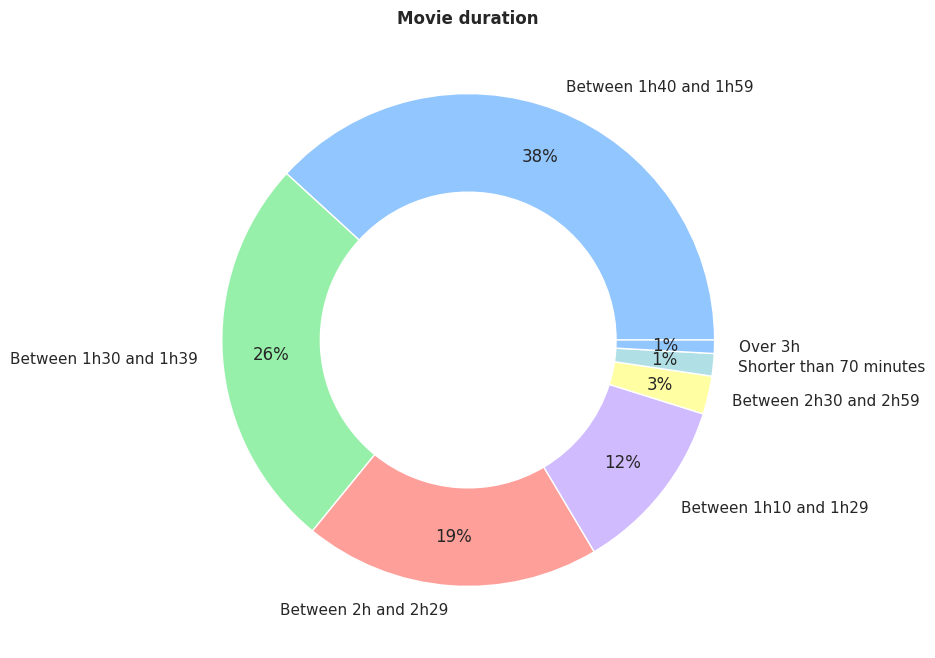

In [23]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quartile Rated'] = df['Month Rated'].apply(year_quartile)
df.head()

,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Month Created,Year Created,Day Rated,Month Rated,Year Rated,Quality,Movie popularity,Movie duration,Quartile Added,Quartile Rated
0,9,2022-12-06,Lionheart,movie,6.2,108.0,1990,"Action, Crime, Drama, Sport",39473,1990-08-01,...,12,2022,6,12,2022,Okay,Over 10k votes,Between 1h40 and 1h59,Fourth,Fourth
1,8,2020-08-09,The Rental,movie,5.7,88.0,2020,"Drama, Horror, Mystery, Thriller",37686,2020-06-18,...,8,2020,9,8,2020,Average,Over 10k votes,Between 1h10 and 1h29,Third,Third
2,8,2021-09-15,The Long Walk Home,movie,7.3,97.0,1990,"Drama, History",4799,1990-09-11,...,9,2021,15,9,2021,Good,Less than 10k votes,Between 1h30 and 1h39,Third,Third
3,8,2023-02-21,Marked for Death,movie,5.9,93.0,1990,"Action, Crime, Drama, Thriller",24150,1990-10-05,...,2,2023,21,2,2023,Average,Over 10k votes,Between 1h30 and 1h39,First,First
4,7,2021-07-05,Men at Work,movie,5.9,98.0,1990,"Action, Comedy, Crime",26558,1990-08-24,...,7,2021,5,7,2021,Average,Over 10k votes,Between 1h30 and 1h39,Third,Third


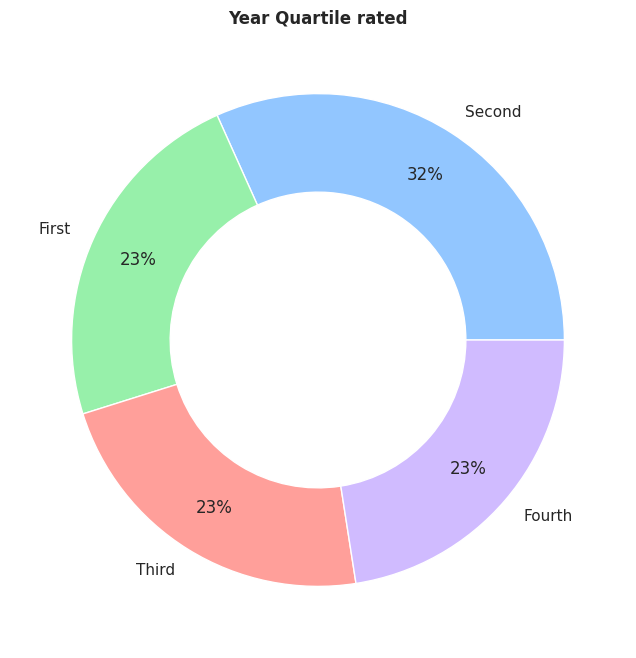

In [27]:
# Displaying the quartile the movie was added based on the algorithm above:
df['Quartile Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile rated', fontweight = 'bold')
plt.show()

In [28]:
# Classifying the movies by the month half rated based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
df['Month Half Rated'] = df['Day Rated'].apply(month_half)
df.head()

,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Year Created,Day Rated,Month Rated,Year Rated,Quality,Movie popularity,Movie duration,Quartile Added,Quartile Rated,Month Half Rated
0,9,2022-12-06,Lionheart,movie,6.2,108.0,1990,"Action, Crime, Drama, Sport",39473,1990-08-01,...,2022,6,12,2022,Okay,Over 10k votes,Between 1h40 and 1h59,Fourth,Fourth,First
1,8,2020-08-09,The Rental,movie,5.7,88.0,2020,"Drama, Horror, Mystery, Thriller",37686,2020-06-18,...,2020,9,8,2020,Average,Over 10k votes,Between 1h10 and 1h29,Third,Third,First
2,8,2021-09-15,The Long Walk Home,movie,7.3,97.0,1990,"Drama, History",4799,1990-09-11,...,2021,15,9,2021,Good,Less than 10k votes,Between 1h30 and 1h39,Third,Third,First
3,8,2023-02-21,Marked for Death,movie,5.9,93.0,1990,"Action, Crime, Drama, Thriller",24150,1990-10-05,...,2023,21,2,2023,Average,Over 10k votes,Between 1h30 and 1h39,First,First,Second
4,7,2021-07-05,Men at Work,movie,5.9,98.0,1990,"Action, Comedy, Crime",26558,1990-08-24,...,2021,5,7,2021,Average,Over 10k votes,Between 1h30 and 1h39,Third,Third,First


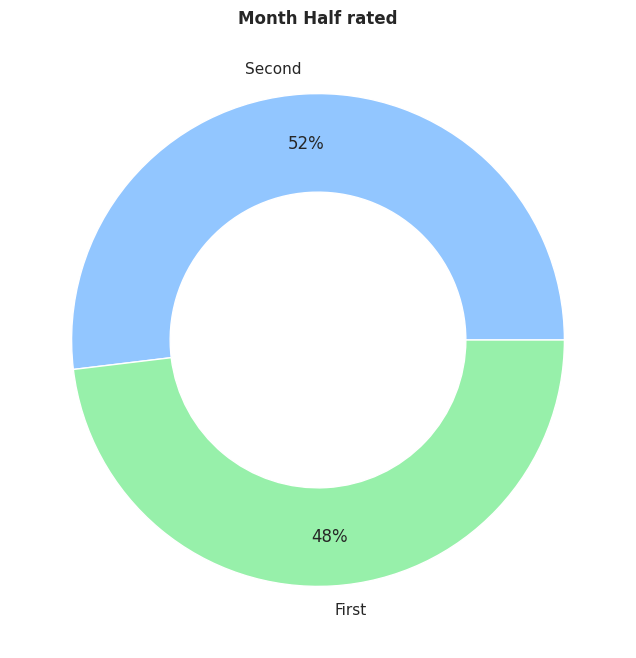

In [29]:
# Displaying the month half the movie was added based on the algorithm above:
df['Month Half Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half rated', fontweight = 'bold')
plt.show()

In [30]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [31]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action        1845   671
Adventure     2127   389
Animation     2455    61
Biography     2367   149
Comedy        2025   491
Crime         1739   777
Documentary   2509     7
Drama         1041  1475
Family        2357   159
Fantasy       2331   185
Film-Noir     2513     3
History       2437    79
Horror        1991   525
Music         2474    42
Musical       2489    27
Mystery       1993   523
Romance       2213   303
Sci-Fi        2289   227
Short         2512     4
Sport         2415   101
Thriller      1228  1288
War           2418    98
Western       2436    80


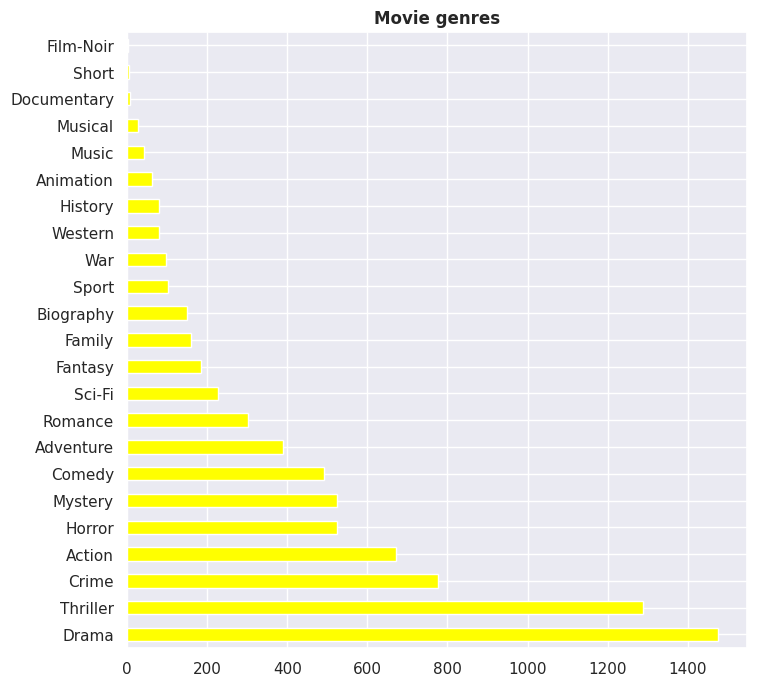

In [32]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()